# Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Load Dataset

In [6]:
# Load the Titanic dataset
df = sns.load_dataset('titanic')
df.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

In [7]:
df.describe()

survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

# Missing Values

In [24]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Calculate the percentage of missing values in each column
missing_percentage = round((df.isnull().sum() / len(df)) * 100, 2)

# Print the number of missing values and percentages in each column
print(pd.concat([missing_values, missing_percentage], axis=1))

               0      1
survived       0   0.00
pclass         0   0.00
sex            0   0.00
age          177  19.87
sibsp          0   0.00
parch          0   0.00
fare           0   0.00
embarked       2   0.22
class          0   0.00
who            0   0.00
adult_male     0   0.00
deck         688  77.22
embark_town    2   0.22
alive          0   0.00
alone          0   0.00


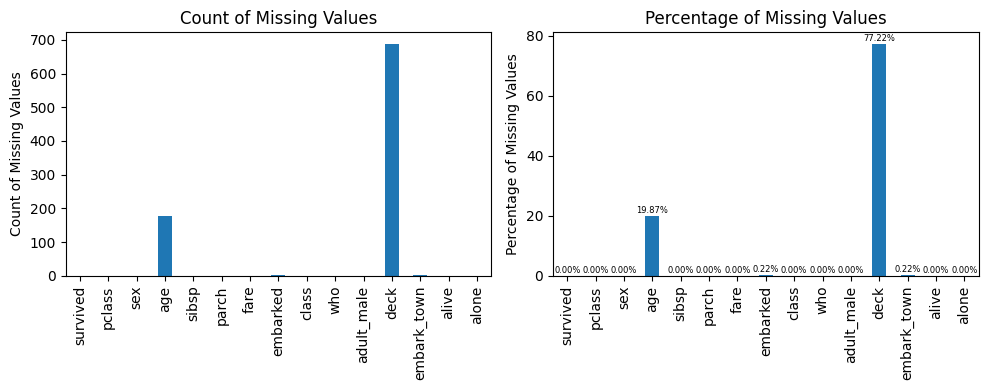

In [34]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Plot the count of missing values
missing_values.plot(ax=ax1, kind='bar')
ax1.set_xlabel('')
ax1.set_ylabel('Count of Missing Values')
ax1.set_title('Count of Missing Values')

# Plot the percentage of missing values
missing_percentage.plot(ax=ax2, kind='bar')
ax2.set_xlabel('')
ax2.set_ylabel('Percentage of Missing Values')
ax2.set_title('Percentage of Missing Values')

# Add the percentage above each bar
for i, value in enumerate(missing_percentage.values):
    plt.text(i, value + 1, f'{value:.2f}%', ha='center', fontsize=6)


# Display the plot
plt.tight_layout()
plt.show()

# Column Distribution (Continuous Numeric)

#### This Will Help Determine How to Deal With Missing Values
* If the distribution is very skewed or there are outliers use median imputation to deal with missing values
* If the distribution is approximately normal use mean imputation to deal with missing values

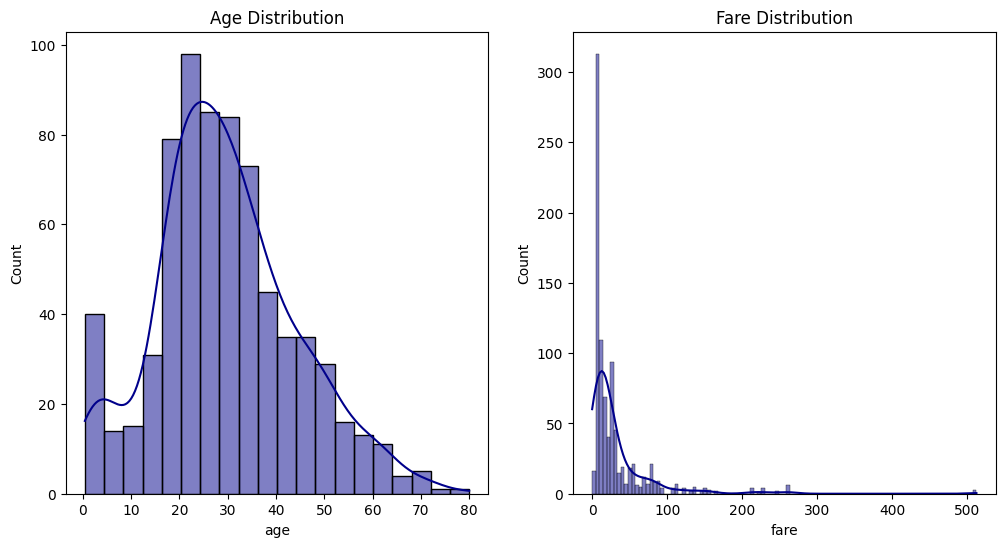

In [46]:

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the distribution of Age
sns.histplot(df['age'], kde=True, color='darkblue', ax=axs[0])
axs[0].set_title('Age Distribution')

# Plot the distribution of Fare
sns.histplot(df['fare'], kde=True, color='darkblue', ax=axs[1])
axs[1].set_title('Fare Distribution')

plt.show()

# Column Distribution (Categorical)
* Check for values that don't make sense (banana when everything is about cities)
* Use mode imputation for categorical values

In [48]:
# Select the categorical columns
categorical_cols = ['sex', 'embarked', 'class', 'deck', 'alone', 'adult_male']

# Generate value counts for each categorical column
for col in categorical_cols:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print("\n")

Value counts for sex:
sex
male      577
female    314
Name: count, dtype: int64


Value counts for embarked:
embarked
S    644
C    168
Q     77
Name: count, dtype: int64


Value counts for class:
class
Third     491
First     216
Second    184
Name: count, dtype: int64


Value counts for deck:
deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64


Value counts for alone:
alone
True     537
False    354
Name: count, dtype: int64


Value counts for adult_male:
adult_male
True     537
False    354
Name: count, dtype: int64




# Label Balance

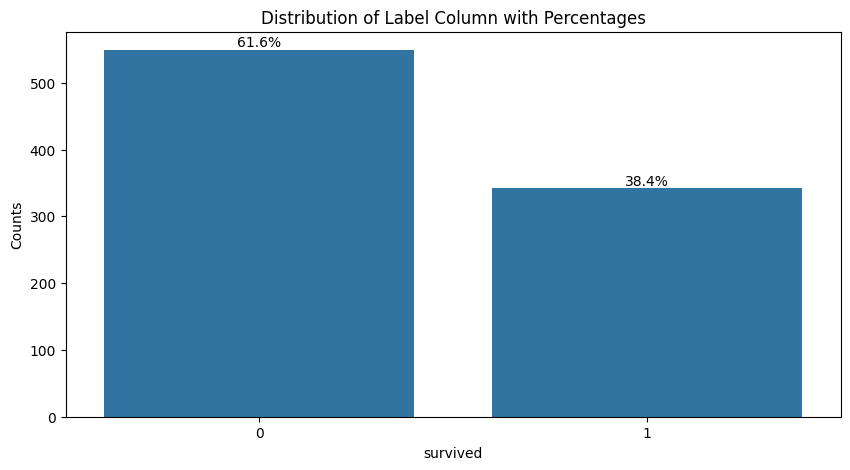

In [43]:
label_col_name = 'survived' # replace with name of label column

plt.figure(figsize=(10, 5))
ax = sns.countplot(x=label_col_name, data=df)

# Add percentages above each bar
total = len(df)
for p in ax.patches:
    height = p.get_height()
    percentage = height / total * 100
    ax.text(p.get_x() + p.get_width() / 2, height + 5, f'{percentage:.1f}%', ha='center')

plt.xlabel(label_col_name)
plt.ylabel('Counts')
plt.title('Distribution of Label Column with Percentages')
plt.show()